The file world_population.csv  contains data
about population densities from 1960 to 2016. Note this is population density (i.e. the number of people per square
kilometer) and not absolute population. So some of the smallest countries have the highest densities.

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/world_population.csv', index_col = 1)
print(data.head())

             Country Name                                     Indicator Name  \
Country Code                                                                   
ABW                 Aruba  Population density (people per sq. km of land ...   
AND               Andorra  Population density (people per sq. km of land ...   
AFG           Afghanistan  Population density (people per sq. km of land ...   
AGO                Angola  Population density (people per sq. km of land ...   
ALB               Albania  Population density (people per sq. km of land ...   

             Indicator Code  1960        1961        1962        1963  \
Country Code                                                            
ABW             EN.POP.DNST   NaN  307.972222  312.366667  314.983333   
AND             EN.POP.DNST   NaN   30.587234   32.714894   34.914894   
AFG             EN.POP.DNST   NaN   14.038148   14.312061   14.599692   
AGO             EN.POP.DNST   NaN    4.305195    4.384299    4.464433   
A

1. Getting data into shape.

To wrangle the data for this exploration, first, we transpose the DataFrame so that each row contains the data for a particular year and each column contains the data for a country. Next, we drop the initial rows containing descriptive data such as 'Country Code', 'Indicator Name', and 'Indicator Code' and delete some of the rows with no data.

In [ ]:
data = data.transpose()
selected = ['Country Name', 'Indicator Name', 'Indicator Code']
data = data.drop(selected, axis = 0)
selected = ['1960', '2016']
data = data.drop(selected, axis = 0)
print(data.head())
print(data.sum())


# Convert the index to date object
data.index = pd.to_datetime(data.index)

Country Code      MAC      MCO          HKG          SGP     GIB     BMU  \
1961          8756.75  11406.0  3105.980392  2540.895522  2179.7   910.0   
1962          9051.25  11521.0  3240.392157  2612.238806  2213.3   932.0   
1963          9435.15  11584.5  3353.823529  2679.104478  2251.0   954.0   
1964          9876.15  11618.5  3435.882353  2748.656716  2289.4   978.0   
1965          10345.5  11641.5  3527.352941  2816.268657  2325.6  1002.0   

Country Code         MLT         BGD         BHR         MDV  ...       ISL  \
1961          1016.40625  380.991089  243.368116  307.756667  ...  1.785825   
1962           1012.1875  392.030452   250.87971  316.363333  ...  1.819232   
1963          1007.96875   403.56914   258.04058  325.186667  ...    1.8519   
1964          1003.90625  415.836137  264.889855  333.923333  ...  1.885117   
1965              996.25  428.939233  271.518841      342.41  ...  1.918065   

Country Code       BWA       LBY       AUS       MRT       NAM      

2. Create a chart showing line plots for population densities for all countries over the period with the legend of the top five countries.

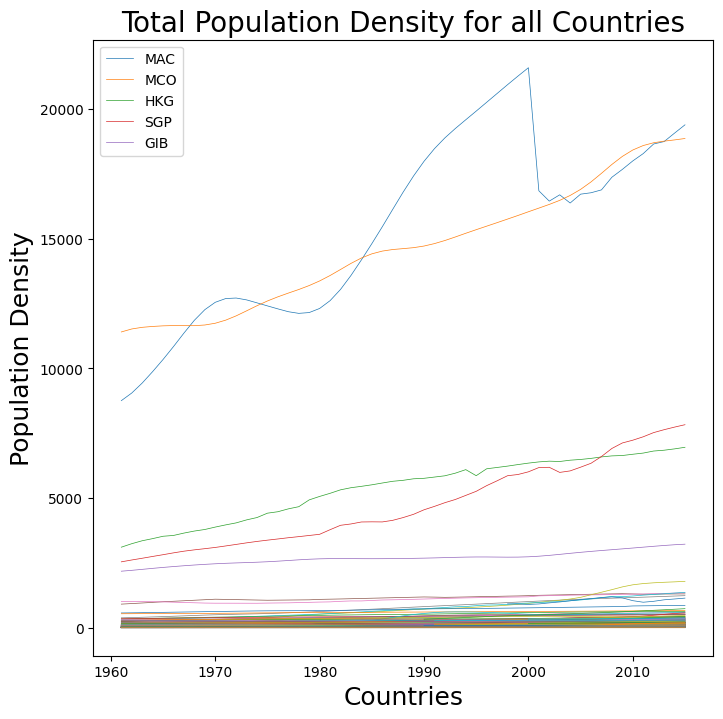

In [ ]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)

plt.figure(figsize=(8, 8))
plt.plot(data, linewidth=0.5)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Population Density', fontsize=18)
plt.title('Total Population Density for all Countries', fontsize=20)
plt.legend(data.columns[:5], loc=2)
plt.show()

3. Now, let's create a chart showing just the top five countries by population density.

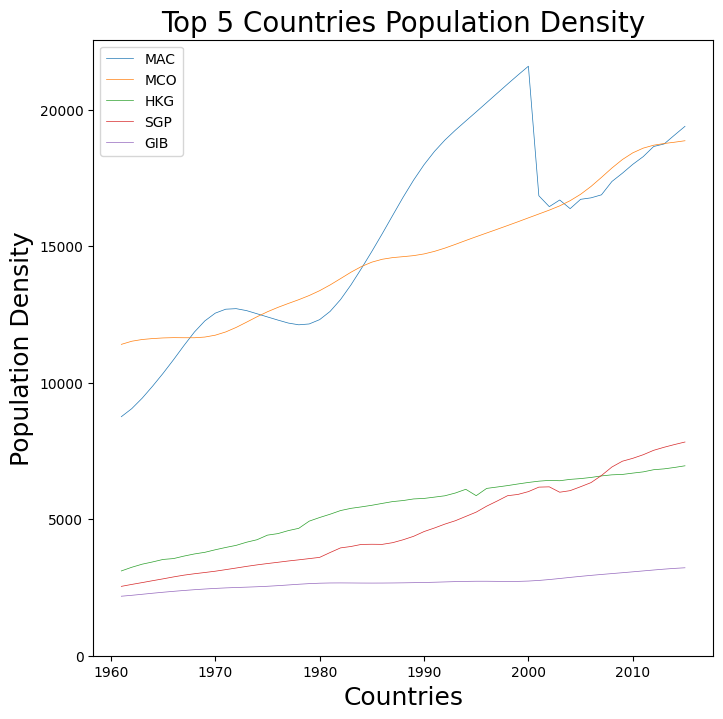

In [ ]:
selected = ['MAC', 'MCO', 'HKG', 'SGP', 'GIB']

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.ylim(ymin=0)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Population Density', fontsize=18)
plt.title('Top 5 Countries Population Density', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()

4. Create the same chart but with a 10-year rolling averages included.

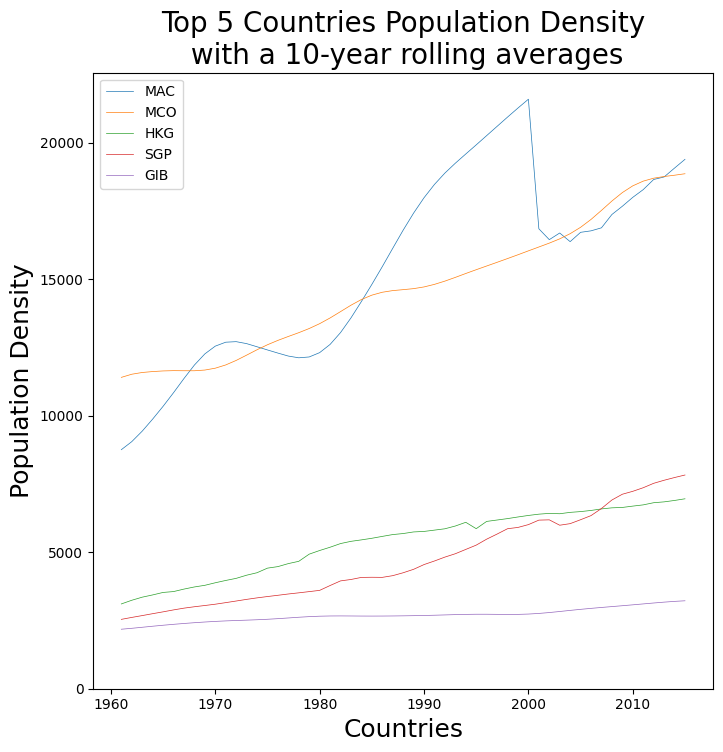

In [ ]:
period = 3650
rolling_average = data.rolling(window=period).mean()

selected = ['MAC', 'MCO', 'HKG', 'SGP', 'GIB']

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.ylim(ymin=0)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Population Density', fontsize=18)
plt.title('Top 5 Countries Population Density\n with a 10-year rolling averages', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()

5. Create the chart with trendlines (but not
rolling averages).

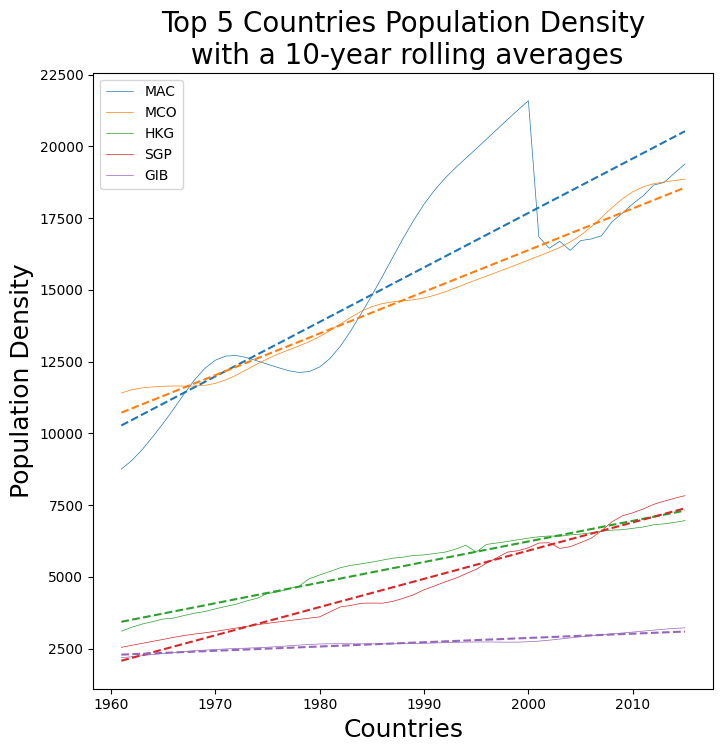

In [ ]:
selected = ['MAC', 'MCO', 'HKG', 'SGP', 'GIB']

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
  x = np.arange(len(data[name]))
  z = np.polyfit(x, data[name].astype(np.float64), 1)
  trend = np.poly1d(z)
  plt.plot(data.index, trend(x), linestyle='--')

plt.xlabel('Countries', fontsize=18)
plt.ylabel('Population Density', fontsize=18)
plt.title('Top 5 Countries Population Density\n with a 10-year rolling averages', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()

The chart does help to see the overall trend for each country.

As of the year 2000, Macao experienced a significant population decline due to the emigration of people to other countries, particularly following the handover of Macao to China in 1999. Many residents were concerned about the political transition and its potential impact on the region, leading to a notable outflow of population.